<a href="https://colab.research.google.com/github/Cynthiaatg/churn_novaedge/blob/main/buiss_case_novaedge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

contexte: novaedge customer retention on one digital payment product
goal= explore data + build predictive model > identify customer churn risk + recommendation to avoid churn

Aperçu des données :


,customer_id,monthly_txn_volume,avg_days_active,num_services_used,has_mobile_app,complaints_last_3mo,received_retention_offer,churned,segment,region,industry_type,customer_notes
0,CUST_00000,2872.42,22.0,1,1,1.0,0,0,Mid,CDMX,Healthcare,no contact
1,CUST_00001,1793.36,24.0,4,1,1.0,0,1,Mid,Querétaro,Healthcare,Late Payment
2,CUST_00002,1658.74,26.0,2,1,0.0,0,1,Mid,CDMX,Logistics,No recent activity
3,CUST_00003,1658.76,19.0,4,0,0.0,1,0,Mid,Jalisco,Services,Late Payment
4,CUST_00004,5579.66,22.0,2,0,0.0,0,0,High,CDMX,Logistics,Potential Upsell



Types de données et valeurs non nulles :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               5000 non-null   object 
 1   monthly_txn_volume        4750 non-null   float64
 2   avg_days_active           4750 non-null   float64
 3   num_services_used         5000 non-null   int64  
 4   has_mobile_app            5000 non-null   int64  
 5   complaints_last_3mo       4750 non-null   float64
 6   received_retention_offer  5000 non-null   int64  
 7   churned                   5000 non-null   int64  
 8   segment                   5000 non-null   object 
 9   region                    5000 non-null   object 
 10  industry_type             5000 non-null   object 
 11  customer_notes            4571 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 468.9+ KB

Statistiques des

,monthly_txn_volume,avg_days_active,num_services_used,has_mobile_app,complaints_last_3mo,received_retention_offer,churned
count,4750.000000,4750.000000,5000.000000,5000.00000,4750.000000,5000.000000,5000.000000
mean,2651.925640,15.511158,2.981800,0.69080,0.522316,0.143200,0.443200
std,3256.181051,8.038611,1.416993,0.46221,0.724556,0.350312,0.496813
min,26.700000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,1197.865000,9.000000,2.000000,0.00000,0.000000,0.000000,0.000000
50%,2049.655000,16.000000,3.000000,1.00000,0.000000,0.000000,0.000000
75%,3286.690000,22.000000,4.000000,1.00000,1.000000,0.000000,1.000000
max,80081.700000,29.000000,5.000000,1.00000,6.000000,1.000000,1.000000


📋 Pourcentage de valeurs manquantes par colonne :


,0
customer_notes,8.58
monthly_txn_volume,5.00
complaints_last_3mo,5.00
avg_days_active,5.00


/tmp/ipython-input-6-546241294.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_vars.values, y=missing_vars.index, palette="Reds_r")


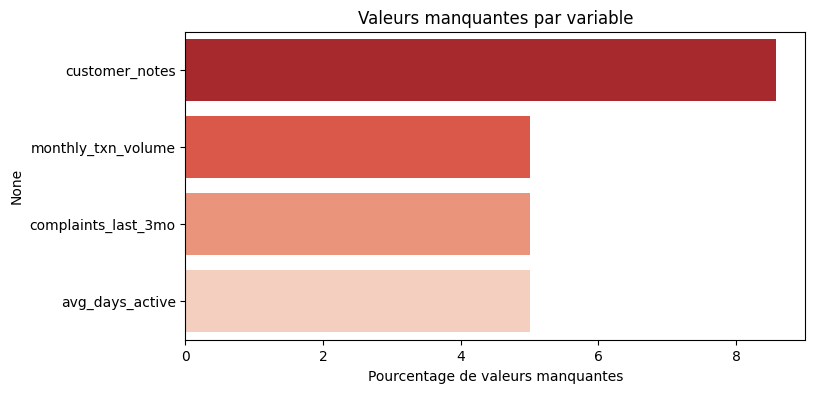

In [6]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Chargement des données
df = pd.read_csv("sample-data.csv")  # adapter le chemin si besoin

# 🔍 Aperçu des données
print("Aperçu des données :")
display(df.head())

print("\nTypes de données et valeurs non nulles :")
df.info()

# 📊 Statistiques descriptives des variables numériques
print("\nStatistiques descriptives :")
display(df.describe())


# 🔍 Pourcentage de valeurs manquantes
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_vars = missing_percent[missing_percent > 0]

print("📋 Pourcentage de valeurs manquantes par colonne :")
display(missing_vars)

# 📊 Visualisation des valeurs manquantes
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_vars.values, y=missing_vars.index, palette="Reds_r")
plt.xlabel("Pourcentage de valeurs manquantes")
plt.title("Valeurs manquantes par variable")
plt.show()



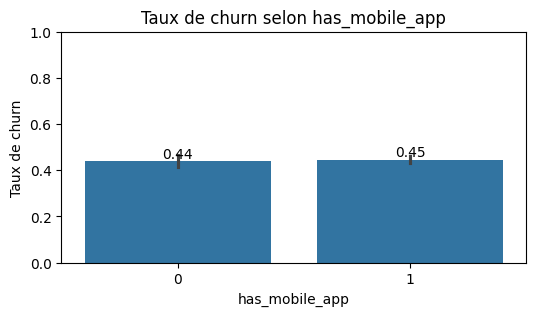

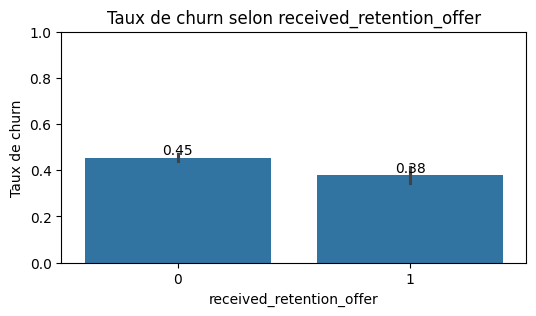

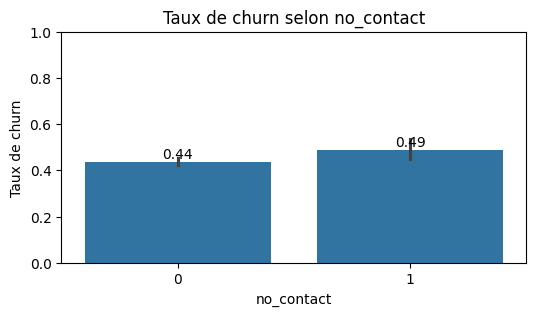

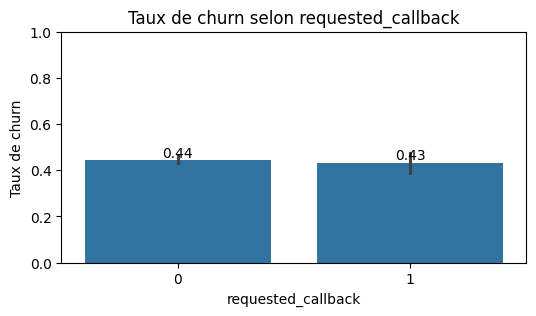

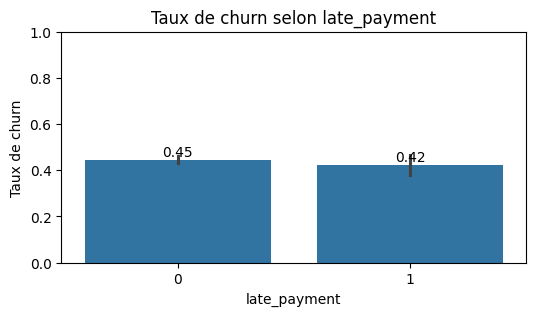

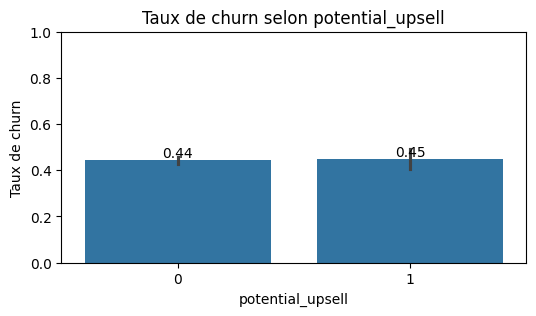

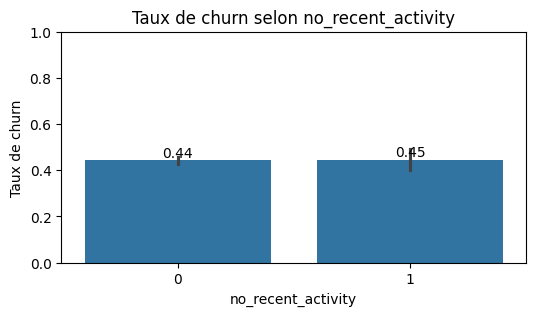

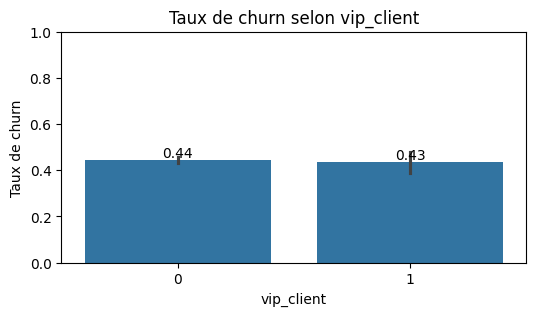

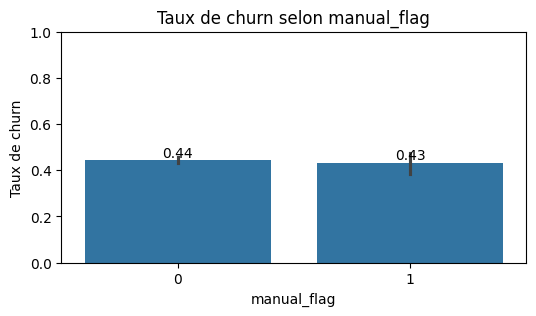

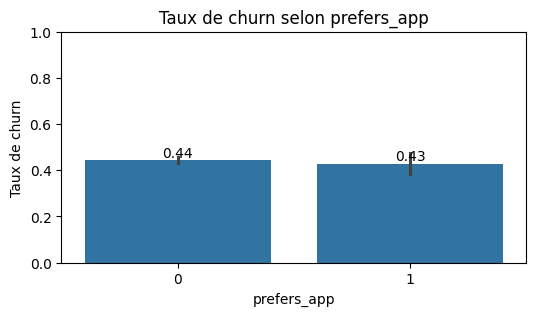

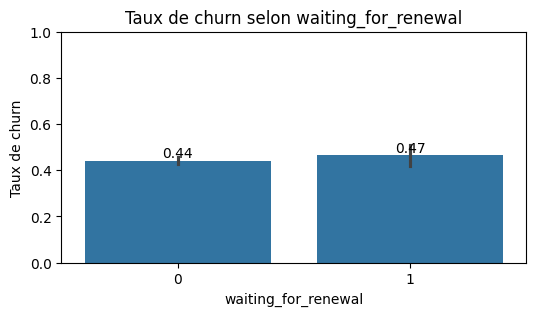

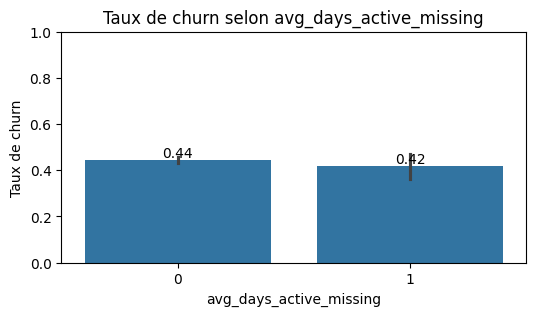

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Séparer les variables binaires des autres numériques
binary_cols = []
numerical_cols = []

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col == 'churned':
        continue
    if df[col].nunique() == 2:
        binary_cols.append(col)
    else:
        numerical_cols.append(col)

# Boucle sur les colonnes binaires pour afficher les barplots avec annotation
for col in binary_cols:
    plt.figure(figsize=(6, 3))
    ax = sns.barplot(x=col, y='churned', data=df)
    plt.title(f"Taux de churn selon {col}")
    plt.ylabel("Taux de churn")

    # Annoter les barres avec la moyenne (hauteur)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height:.2f}",  # annotation au-dessus de chaque barre
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

    plt.ylim(0, 1)  # Échelle de 0 à 1 pour bien voir les proportions
    plt.show()


pas de différence significatives

TRAITEMENT DES VALEURS MANQUANTES DANS CUSTOMER_NOTES

Fréquence des customer_notes :


,count
customer_notes,
no contact,492
Requested callback,483
Late Payment,476
Potential Upsell,469
No recent activity,460
VIP Client,459
manual_flag,458
Prefers App,448
NaN,429


/tmp/ipython-input-8-1913873735.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_notes.values, y=top_notes.index, palette="Blues_r")


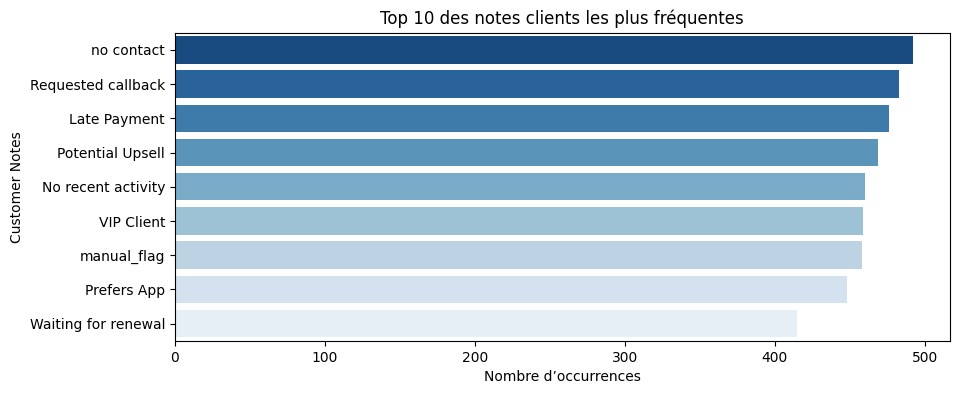

In [8]:
# On affiche les notes uniques et leur fréquence
note_counts = df['customer_notes'].value_counts(dropna=False)

print("Fréquence des customer_notes :")
display(note_counts)

# Visualisation des 10 notes les plus fréquentes
import seaborn as sns
import matplotlib.pyplot as plt

top_notes = note_counts.head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_notes.values, y=top_notes.index, palette="Blues_r")
plt.title("Top 10 des notes clients les plus fréquentes")
plt.xlabel("Nombre d’occurrences")
plt.ylabel("Customer Notes")
plt.show()


DATA VERY IMPORTANT THAT WE CAN TRANSFORM INTO ENCODED COLUMS > resolve the nAn problem

In [12]:
import re

# 1. Remplacement des valeurs manquantes
df['customer_notes'] = df['customer_notes'].fillna("no_note")

# 2. Liste des notes à encoder
top_notes = [
    "no contact",
    "Requested callback",
    "Late Payment",
    "Potential Upsell",
    "No recent activity",
    "VIP Client",
    "manual_flag",
    "Prefers App",
    "Waiting for renewal"
]

#  3. Création des colonnes binaires sans préfixe
for note in top_notes:
    clean_name = re.sub(r'[^a-z0-9_]', '', note.lower().replace(" ", "_"))
    df[clean_name] = df['customer_notes'].str.contains(note, case=False).astype(int)

#  4. Vérification du résultat
created_cols = [note.lower().replace(" ", "_") for note in top_notes]
print("Colonnes créées :", created_cols)
df[created_cols].head()


✅ Colonnes créées : ['no_contact', 'requested_callback', 'late_payment', 'potential_upsell', 'no_recent_activity', 'vip_client', 'manual_flag', 'prefers_app', 'waiting_for_renewal']


,no_contact,requested_callback,late_payment,potential_upsell,no_recent_activity,vip_client,manual_flag,prefers_app,waiting_for_renewal
0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [13]:
# Aperçu des colonnes, types, valeurs uniques et taux de remplissage
summary = pd.DataFrame({
    'Type': df.dtypes,
    'Nb valeurs uniques': df.nunique(),
    'Nb valeurs manquantes': df.isnull().sum(),
    '% valeurs manquantes': round(df.isnull().mean() * 100, 2)
}).sort_values(by='% valeurs manquantes', ascending=False)

print("Aperçu complet des colonnes :")
display(summary)

🔍 Aperçu complet des colonnes :


,Type,Nb valeurs uniques,Nb valeurs manquantes,% valeurs manquantes
monthly_txn_volume,float64,4722,250,5.0
avg_days_active,float64,28,250,5.0
complaints_last_3mo,float64,6,250,5.0
customer_id,object,5000,0,0.0
num_services_used,int64,5,0,0.0
has_mobile_app,int64,2,0,0.0
received_retention_offer,int64,2,0,0.0
churned,int64,2,0,0.0
segment,object,3,0,0.0
region,object,15,0,0.0


TRAITEMENT DES VALEURS MANQUANTES AVG_DAYS_ACTIVE

Creéation d'une noiuvelle colonne + fillnan w/ median (bonne pratique pour garder l'information des id avec des nan)

In [18]:
# 1. Création du flag
df['avg_days_active_missing'] = df['avg_days_active'].isnull().astype(int)

# 2. Imputation par la médiane
df['avg_days_active'] = df['avg_days_active'].fillna(df['avg_days_active'].median())

In [29]:
!git remote add origin https://github.com/Cynthiaatg/churn_novaedge.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
